In [1]:
import io
from copy import copy
from collections import OrderedDict
#from hamcrest import none
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import scipy
import h5py
import mne
import hypyp
import requests
import os

from hypyp import (
    prep,
)  # need pip install https://api.github.com/repos/autoreject/autoreject/zipball/master
from hypyp import analyses
from hypyp import stats
from hypyp import viz
import autoreject

from my_utils import extract_trials, create_sub_epochs

In [2]:
import hypyp
from hypyp import prep

In [3]:
path = r"C:\Users\Administrator\Documents\MATLAB\Hyperscanning Analysis"
raw_path = os.path.join(path, "raw data")
file_path = os.path.join(path, "raw data/P59P60_18_03.bdf")

In [24]:
try:
    del epochs_1, epcohs_2
except:
    print('define raw')
raw = mne.io.read_raw_bdf(file_path)
channels_1 = raw.info.ch_names[:64]
print(channels_1)
print(len(channels_1))
raw_1 = raw.pick_channels(channels_1)
raw = mne.io.read_raw_bdf(file_path)
channels_2 = raw.info.ch_names[76:140]
raw_2 = raw.pick_channels(channels_2)
print(channels_2)
print(len(channels_2))


define raw
Extracting EDF parameters from C:\Users\Administrator\Documents\MATLAB\Hyperscanning Analysis\raw data\P59P60_18_03.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
['1-A1', '1-A2', '1-A3', '1-A4', '1-A5', '1-A6', '1-A7', '1-A8', '1-A9', '1-A10', '1-A11', '1-A12', '1-A13', '1-A14', '1-A15', '1-A16', '1-A17', '1-A18', '1-A19', '1-A20', '1-A21', '1-A22', '1-A23', '1-A24', '1-A25', '1-A26', '1-A27', '1-A28', '1-A29', '1-A30', '1-A31', '1-A32', '1-B1', '1-B2', '1-B3', '1-B4', '1-B5', '1-B6', '1-B7', '1-B8', '1-B9', '1-B10', '1-B11', '1-B12', '1-B13', '1-B14', '1-B15', '1-B16', '1-B17', '1-B18', '1-B19', '1-B20', '1-B21', '1-B22', '1-B23', '1-B24', '1-B25', '1-B26', '1-B27', '1-B28', '1-B29', '1-B30', '1-B31', '1-B32']
64
Extracting EDF parameters from C:\Users\Administrator\Documents\MATLAB\Hyperscanning Analysis\raw data\P59P60_18_03.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
['2-A1', '2-A2'

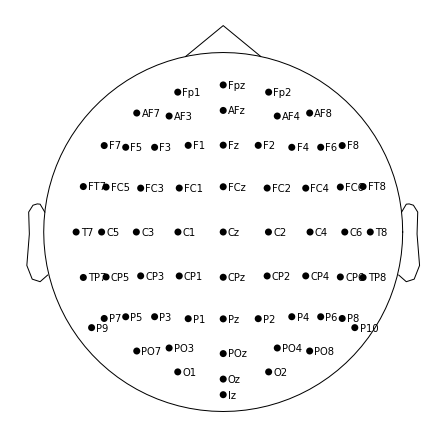

Fp1
AF7
AF3
F1
F3
F5
F7
FT7
FC5
FC3
FC1
C1
C3
C5
T7
TP7
CP5
CP3
CP1
P1
P3
P5
P7
P9
PO7
PO3
O1
Iz
Oz
POz
Pz
CPz
Fpz
Fp2
AF8
AF4
AFz
Fz
F2
F4
F6
F8
FT8
FC6
FC4
FC2
FCz
Cz
C2
C4
C6
T8
TP8
CP6
CP4
CP2
P2
P4
P6
P8
P10
PO8
PO4
O2


<RawEDF | P59P60_18_03.bdf, 64 x 7462912 (3644.0 s), ~91 kB, data not loaded>

In [35]:
%matplotlib inline


# get the montage that we will use
biosemi64_montage = mne.channels.make_standard_montage('biosemi64')
biosemi64_montage.plot()  # 2D

# change the channel names in our epochs so that they are the same as the montage
channels = biosemi64_montage.ch_names
mapping_1 = {}
mapping_2 = {}
for i in range(len(channels)):
    print(str(channels[i]))
    mapping_1[raw_1.info['chs'][i]['ch_name']] = str(channels[i])
    mapping_2[raw_2.info['chs'][i]['ch_name']] = str(channels[i])
mne.rename_channels(raw_1.info, mapping_1)
mne.rename_channels(raw_2.info, mapping_2)

raw_1.pick_channels(channels)
raw_2.pick_channels(channels)


# set the montage to the epochs
raw_1.set_montage(biosemi64_montage)
raw_2.set_montage(biosemi64_montage)

Extracting EDF parameters from C:\Users\Administrator\Documents\MATLAB\Hyperscanning Analysis\raw data\P59P60_18_03.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Trigger channel has a non-zero initial value of 65536 (consider using initial_event=True to detect this event)
Removing orphaned offset at the beginning of the file.
2953 events found
Event IDs: [  2   3   4   5   6   7   8 100 101 110 111 112 113 114 115 142 143 144
 145 146 147 148 150 200 201 210 211 212 213 214 215 242 243 244 246 247
 248 250 253 255]
[  6 100 200 ... 212 150 250]


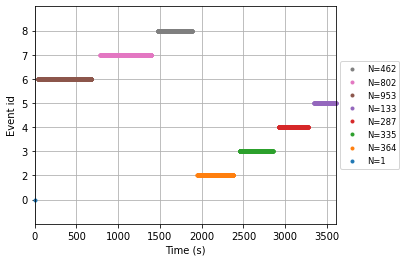

fs2048.0


In [5]:
# for separate plot use %matplotlib qt
#%matplotlib qt
# for inline plot use %matplotlib inline

raw = mne.io.read_raw_bdf(file_path)
raw_events = mne.find_events(raw, shortest_event = 0)
trials = extract_trials(raw_events)
sfreq = raw.info['sfreq']
events, event_successes = create_sub_epochs(trials, sfreq)
mne.viz.plot_events(events, sfreq=raw.info['sfreq']);
print("fs" + str(raw.info['sfreq']))
event_id = {'Synchronous/Egalitarian': 2, 'Synchronous/LeaderFollower': 3, 'Synchronous/FollowerLeader': 4, 'Individual': 5, 'Complementary/Egalitarian': 6, 'Complementary/LeaderFollower': 7, 'Complementary/FollowerLeader': 8}


In [36]:
%reset_selective -f epochs_1, epochs_2
epochs_1 = mne.Epochs(raw_1, events, event_id, event_repeated = 'drop', tmin=0, tmax=1, preload=True, baseline=(0, 0))
epochs_1.resample(sfreq = 512)
epochs_2 = mne.Epochs(raw_2, events, event_id, event_repeated = 'drop', tmin=0, tmax=1, preload=True, baseline=(0, 0))
epochs_2.resample(sfreq = 512)


Not setting metadata
3336 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Loading data for 3336 events and 2049 original time points ...


C:\Users\Administrator\AppData\Local\Temp\ipykernel_18920\2186118728.py:2: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  epochs_1 = mne.Epochs(raw_1, events, event_id, event_repeated = 'drop', tmin=0, tmax=1, preload=True, baseline=(0, 0))


0 bad epochs dropped
Not setting metadata
3336 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Loading data for 3336 events and 2049 original time points ...


C:\Users\Administrator\AppData\Local\Temp\ipykernel_18920\2186118728.py:4: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  epochs_2 = mne.Epochs(raw_2, events, event_id, event_repeated = 'drop', tmin=0, tmax=1, preload=True, baseline=(0, 0))


0 bad epochs dropped


Number of events,3336
Events,Complementary/Egalitarian: 953Complementary/FollowerLeader: 462Complementary/LeaderFollower: 802Individual: 133Synchronous/Egalitarian: 364Synchronous/FollowerLeader: 287Synchronous/LeaderFollower: 335
Time range,0.000 – 0.998 sec
Baseline,0.000 – 0.000 sec


NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
    Using multitaper spectrum estimation with 7 DPSS windows
Averaging across epochs...
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 1691 samples (3.303 sec)



C:\Python39\lib\site-packages\mne\viz\utils.py:137: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_18920\219762596.py:2: RuntimeWarning: filter_length (1691) is longer than the signal (512), distortion is likely. Reduce filter length or filter a longer signal.
  epochs_1.filter(1, 40)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 213504 out of 213504 | elapsed:   57.7s finished


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
    Using multitaper spectrum estimation with 7 DPSS windows
Averaging across epochs...
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 1691 samples (3.303 sec)



C:\Python39\lib\site-packages\mne\viz\utils.py:137: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_18920\219762596.py:6: RuntimeWarning: filter_length (1691) is longer than the signal (512), distortion is likely. Reduce filter length or filter a longer signal.
  epochs_2.filter(1, 40)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 213504 out of 213504 | elapsed:   57.7s finished


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
    Using multitaper spectrum estimation with 7 DPSS windows
Averaging across epochs...


C:\Python39\lib\site-packages\mne\viz\utils.py:137: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


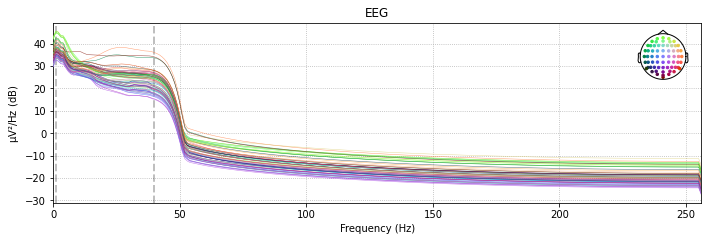

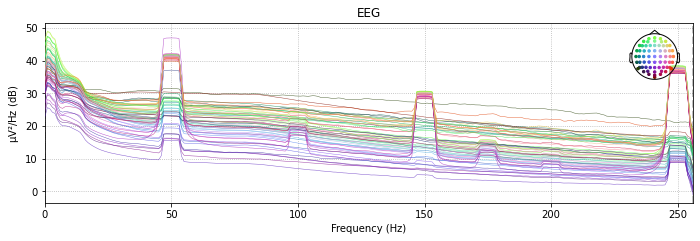

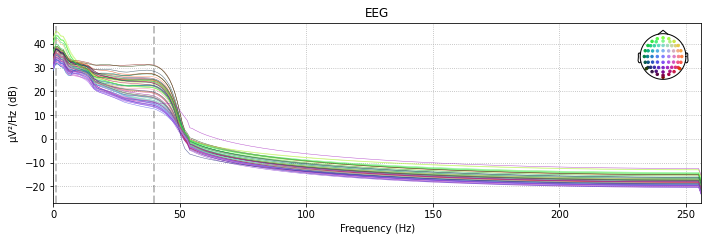

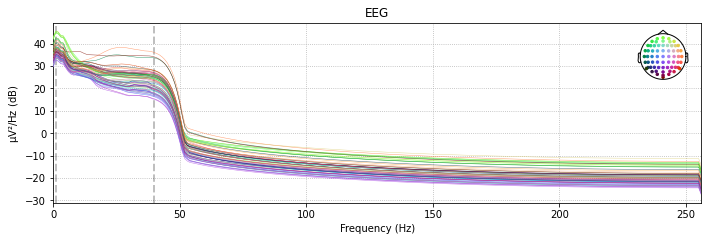

In [37]:
epochs_1.plot_psd(area_mode='range', tmax=100.0, average=False)
epochs_1.filter(1, 40)
epochs_1.set_eeg_reference(ref_channels='average')
epochs_1.plot_psd(area_mode='range', tmax=1000.0, average=False)

epochs_2.filter(1, 40)
epochs_2.set_eeg_reference(ref_channels='average')
epochs_2.plot_psd(area_mode='range', tmax=1000.0, average=False)



In [40]:
# after rereferencing and filtering
# do autoreject and ica
icas = prep.ICA_fit([epochs_1, epochs_2],
                    n_components=15,
                    method='infomax',
                    fit_params=dict(extended=True),
                    random_state= 42)

Estimating rejection dictionary for eeg
The rejection dictionary is {'eeg': 0.0001744329568848753}
Fitting ICA to data using 64 channels (please be patient, this may take a while)


C:\Users\Administrator\AppData\Roaming\Python\Python39\site-packages\hypyp\prep.py:219: RuntimeWarning: The epochs you passed to ICA.fit() were baseline-corrected. However, we suggest to fit ICA only on data that has been high-pass filtered, but NOT baseline-corrected.
  ica = ICA(n_components=n_components,


Selecting by number: 15 components
Computing Extended Infomax ICA
Fitting ICA took 190.1s.
Fitting ICA to data using 64 channels (please be patient, this may take a while)


C:\Users\Administrator\AppData\Roaming\Python\Python39\site-packages\hypyp\prep.py:226: RuntimeWarning: The epochs you passed to ICA.fit() were baseline-corrected. However, we suggest to fit ICA only on data that has been high-pass filtered, but NOT baseline-corrected.
  icas.append(ica.fit(epoch_all_ch, reject=reject, tstep=1))
C:\Users\Administrator\AppData\Roaming\Python\Python39\site-packages\hypyp\prep.py:226: RuntimeWarning: The following parameters passed to ICA.fit() will be ignored, as they only affect raw data (and it appears you passed epochs): reject
  icas.append(ica.fit(epoch_all_ch, reject=reject, tstep=1))


Selecting by number: 15 components
Computing Extended Infomax ICA
Fitting ICA took 190.4s.
Estimating rejection dictionary for eeg
The rejection dictionary is {'eeg': 0.00015099365727168357}
Fitting ICA to data using 64 channels (please be patient, this may take a while)


C:\Users\Administrator\AppData\Roaming\Python\Python39\site-packages\hypyp\prep.py:219: RuntimeWarning: The epochs you passed to ICA.fit() were baseline-corrected. However, we suggest to fit ICA only on data that has been high-pass filtered, but NOT baseline-corrected.
  ica = ICA(n_components=n_components,


Selecting by number: 15 components
Computing Extended Infomax ICA
Fitting ICA took 192.5s.
Fitting ICA to data using 64 channels (please be patient, this may take a while)


C:\Users\Administrator\AppData\Roaming\Python\Python39\site-packages\hypyp\prep.py:226: RuntimeWarning: The epochs you passed to ICA.fit() were baseline-corrected. However, we suggest to fit ICA only on data that has been high-pass filtered, but NOT baseline-corrected.
  icas.append(ica.fit(epoch_all_ch, reject=reject, tstep=1))
C:\Users\Administrator\AppData\Roaming\Python\Python39\site-packages\hypyp\prep.py:226: RuntimeWarning: The following parameters passed to ICA.fit() will be ignored, as they only affect raw data (and it appears you passed epochs): reject
  icas.append(ica.fit(epoch_all_ch, reject=reject, tstep=1))


Selecting by number: 15 components
Computing Extended Infomax ICA
Fitting ICA took 182.5s.


C:\Users\Administrator\AppData\Roaming\Python\Python39\site-packages\mne_icalabel\iclabel\features.py:54: RuntimeWarning: The provided Epochs instance is not filtered between 1 and 100 Hz. ICLabel was designed to classify features extracted from an EEG dataset bandpass filtered between 1 and 100 Hz (see the 'filter()' method for Raw and Epochs instances).
  warn(
C:\Users\Administrator\AppData\Roaming\Python\Python39\site-packages\mne_icalabel\iclabel\utils.py:139: RuntimeWarning: divide by zero encountered in log
  g = np.square(d) * (np.log(d) - 1)  # % Green's function.
C:\Users\Administrator\AppData\Roaming\Python\Python39\site-packages\mne_icalabel\iclabel\utils.py:139: RuntimeWarning: invalid value encountered in multiply
  g = np.square(d) * (np.log(d) - 1)  # % Green's function.


Applying ICA to Epochs instance


C:\Users\Administrator\AppData\Roaming\Python\Python39\site-packages\hypyp\prep.py:161: RuntimeWarning: The data you passed to ICA.apply() was baseline-corrected. Please note that ICA can introduce DC shifts, therefore you may wish to consider baseline-correcting the cleaned data again.
  ica.apply(cleaned_epoch_ICA, exclude=excluded_idx_components)


    Transforming to ICA space (15 components)
    Zeroing out 6 ICA components
    Projecting back using 64 PCA components
Using matplotlib as 2D backend.


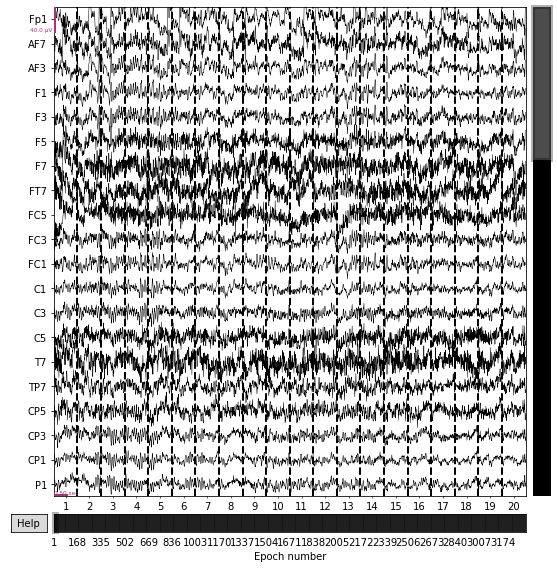

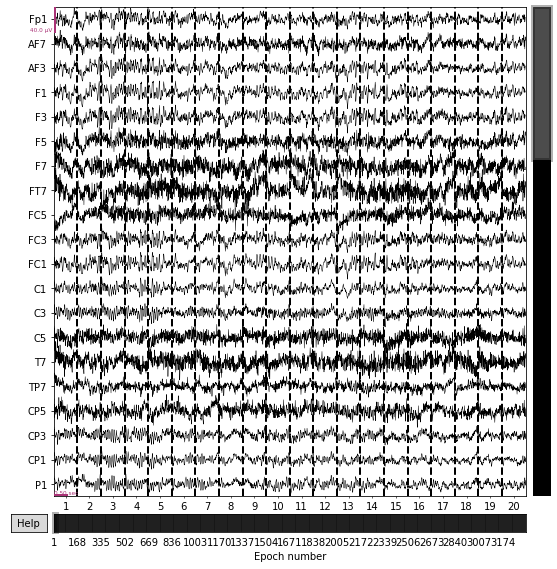

C:\Users\Administrator\AppData\Roaming\Python\Python39\site-packages\mne_icalabel\iclabel\features.py:54: RuntimeWarning: The provided Epochs instance is not filtered between 1 and 100 Hz. ICLabel was designed to classify features extracted from an EEG dataset bandpass filtered between 1 and 100 Hz (see the 'filter()' method for Raw and Epochs instances).
  warn(
C:\Users\Administrator\AppData\Roaming\Python\Python39\site-packages\mne_icalabel\iclabel\utils.py:139: RuntimeWarning: divide by zero encountered in log
  g = np.square(d) * (np.log(d) - 1)  # % Green's function.
C:\Users\Administrator\AppData\Roaming\Python\Python39\site-packages\mne_icalabel\iclabel\utils.py:139: RuntimeWarning: invalid value encountered in multiply
  g = np.square(d) * (np.log(d) - 1)  # % Green's function.


Applying ICA to Epochs instance


C:\Users\Administrator\AppData\Roaming\Python\Python39\site-packages\hypyp\prep.py:161: RuntimeWarning: The data you passed to ICA.apply() was baseline-corrected. Please note that ICA can introduce DC shifts, therefore you may wish to consider baseline-correcting the cleaned data again.
  ica.apply(cleaned_epoch_ICA, exclude=excluded_idx_components)


    Transforming to ICA space (15 components)
    Zeroing out 10 ICA components
    Projecting back using 64 PCA components


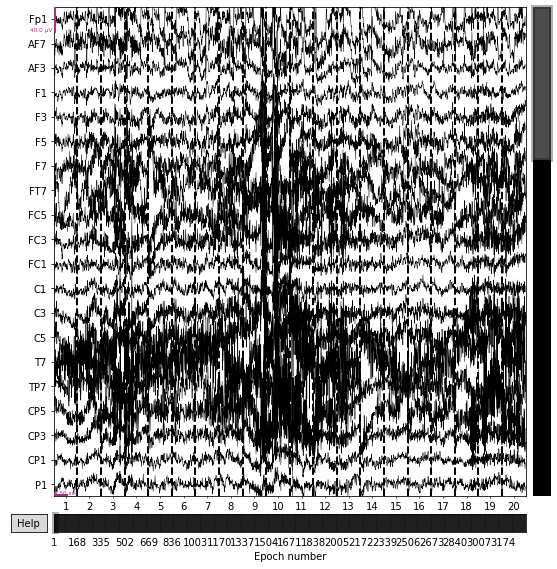

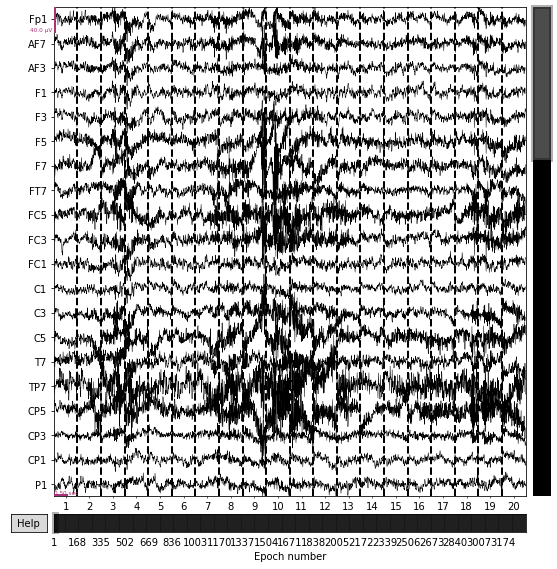

In [41]:
cleaned_epochs_ICA = prep.ICA_autocorrect(icas, [epochs_1, epochs_2], verbose=True)
#cleaned_epochs_ICA = prep.ICA_choice_comp(icas, [epochs_1, epochs_2])


In [43]:
# with ICA
try:
    del epochs_1, epochs_2
except:
    print('epochs not present anymore')
cleaned_epochs_AR, dic_AR = prep.AR_local(cleaned_epochs_ICA,
                                          strategy="union",
                                          threshold=50.0,
                                          verbose=True
)

Running autoreject on ch_type=eeg


100%|██████████| Creating augmented epochs : 64/64 [01:24<00:00,    1.32s/it]
